## Support Vector Machine Classification

**We have to create an SVM model to classify whether a given instance of a patient having to M=malignant or B=benign.**

In [1]:
# Import required libraries 
import pandas as pd
import numpy as np

In [2]:
# Read dataset
data = pd.read_csv('wisc_bc_data.csv')

In [3]:
data.shape

(569, 32)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Define dependent and independent variables
X = data.iloc[:,2:].values  # input parameter
y = data.iloc[:,1].values  # output parameter

In [6]:
# convert the dataset into training and testing subsets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
len(X_train)

455

In [8]:
len(X_test)

114

In [10]:
# perform Feature Scaling if required
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
# Create SVM classification model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [13]:
result=pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

result.head()

,Actual,Predicted
0,M,M
1,B,B
2,B,B
3,B,B
4,B,B


Confusion Matrix : 
 [[67  0]
 [ 2 45]]


<AxesSubplot:>

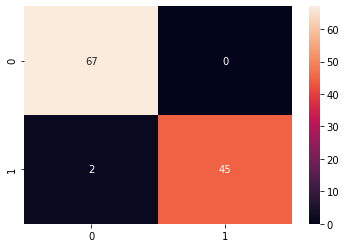

In [14]:
# Analyse the predicted output using confusion matrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True)

In [15]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        67
           M       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [16]:
# Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)*100
print("Accuracy Score = ",ac)

Accuracy Score =  98.24561403508771


In [18]:
# Predict the output for any one new input
input = [[11.99,9.38,111.80,1000.0,0.12254,0.25800,0.1001,0.11710,22.38,10.33,145.60,2015.0,0.1152,0.6666,0.7000,0.2222,0.4501,0.12000,0.2135,0.2251,12.005,0.2584,0.3265,0.2548,0.5426,0.3684,0.4125,0.8514,0.9632,0.2541]]
output = classifier.predict(sc_X.transform(np.array(input).reshape(1,-1)))
output = 'Malignant' if output == "M" else "Benign"
print("Predicted Output:",output)

Predicted Output: Malignant
